The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
y = [0.6394268]x^2 + [0.02501076]x + [0.27502932]


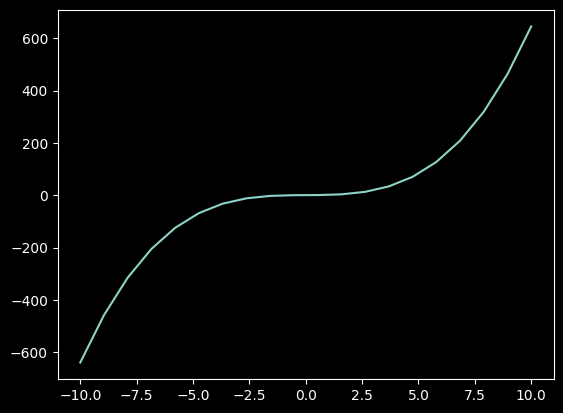

In [41]:
%load_ext autoreload
%autoreload 2

import random

import numpy as np
import matplotlib.pyplot as plt

from automatic_diff_engine.tensor.tensor import Tensor

random.seed(42)

x = Tensor(np.linspace(-10, 10, 20), requires_grad=False)
a = Tensor(random.random(), requires_grad=False)
b = Tensor(random.random(), requires_grad=False)
c = Tensor(random.random(), requires_grad=False)
d = Tensor(random.random(), requires_grad=False)

print (f"y = {a.value}x^2 + {b.value}x + {c.value}")
y = x*x*x*a + x*x*b + x*c + d

plt.plot(x.value, y.value)
plt.show()

[78937.60042259]


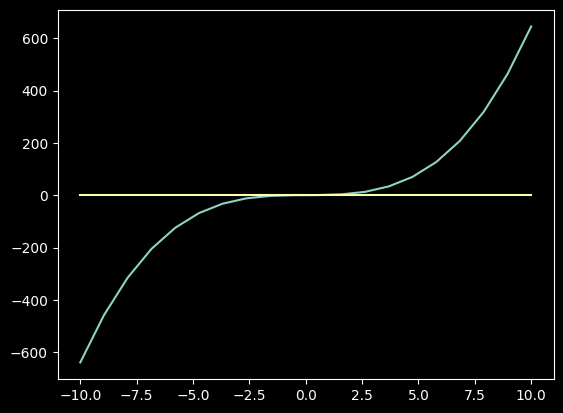

[17030.17789211]


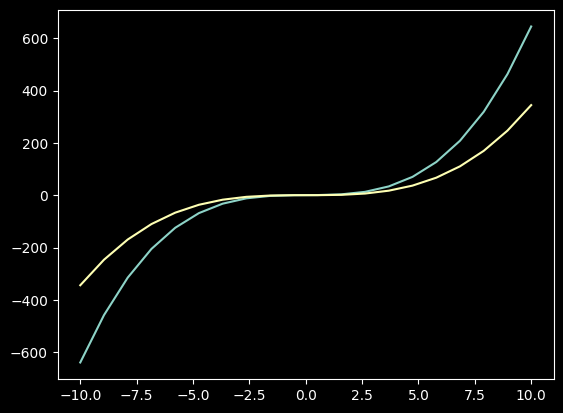

[3675.54487052]


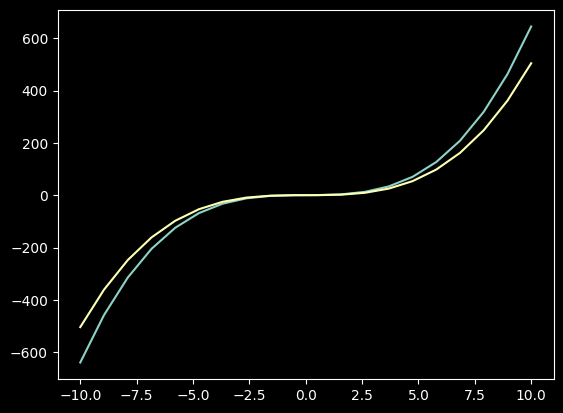

[794.66906405]


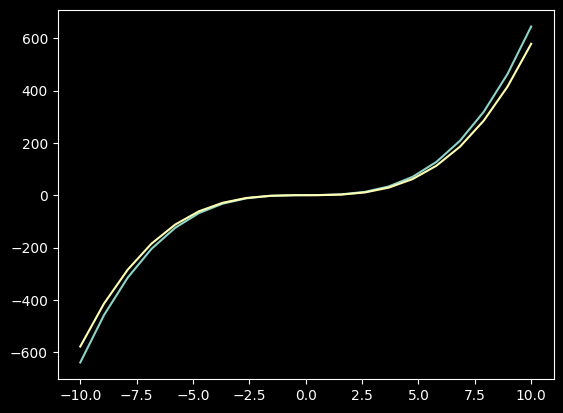

[173.18168973]


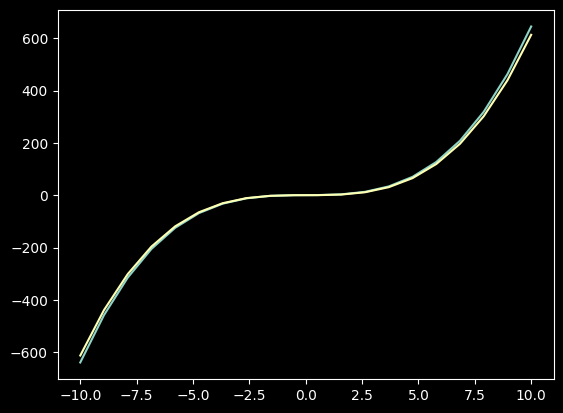

[39.08774787]


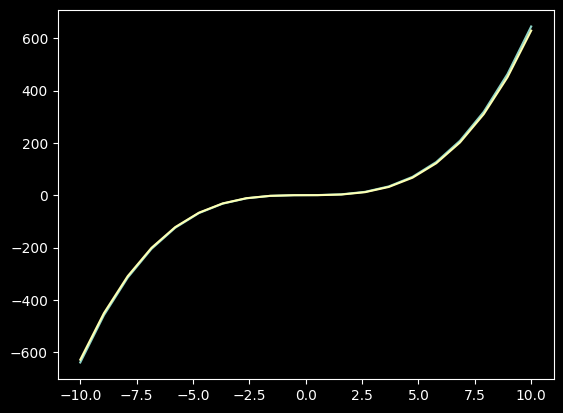

[10.13433163]


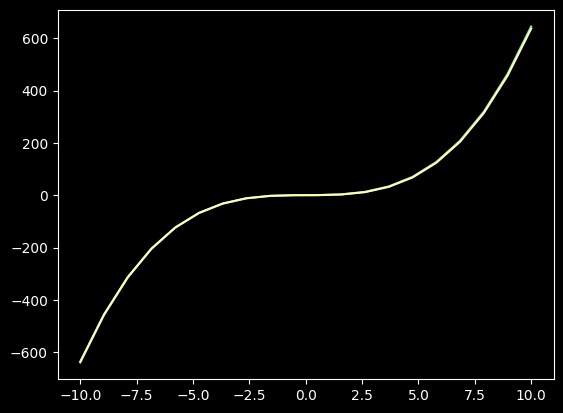

[3.86223603]


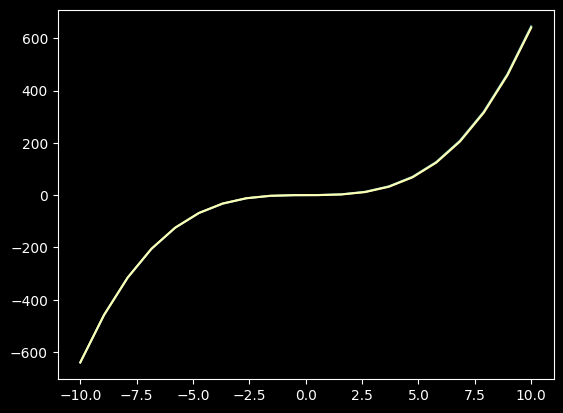

[2.48343819]


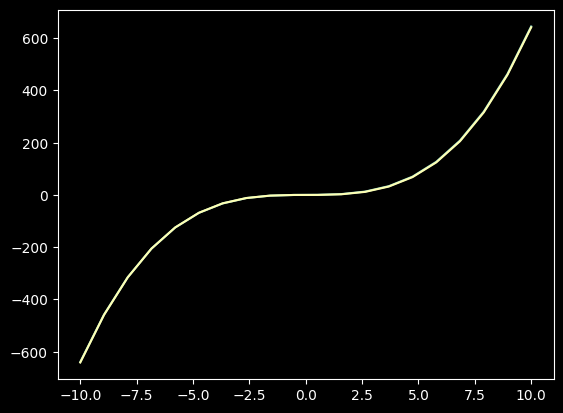

[2.16071473]


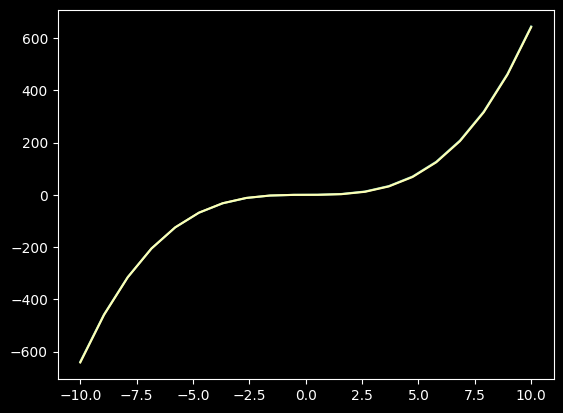

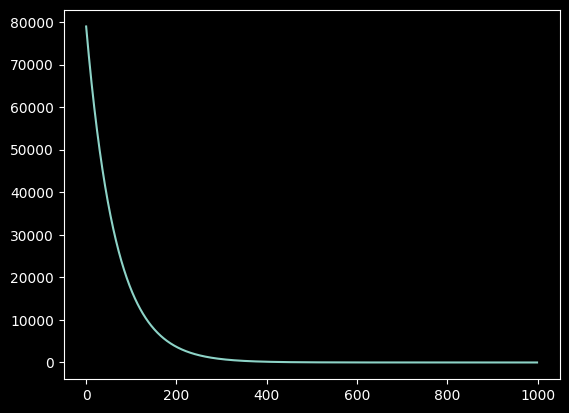

[0.6425284] [0.00263474] [0.00825541] [4.38145325e-05]
[0.6394268] [4.38145325e-05] [0.27502932] [0.22321074]


In [45]:
from src.automatic_diff_engine.tensor.tensor import Tensor

class SGD:
    def __init__(self, parameters, learning_rate):
        self.parameters = parameters
        self.learning_rate = learning_rate

    def step(self):
        for parameter in self.parameters:
            parameter.value = parameter.value - parameter.grad * self.learning_rate

    def zero_grad(self):
        for parameter in self.parameters:
            parameter.zero_grad()



w1 = Tensor(0)
w2 = Tensor(0)
w3 = Tensor(0)
b = Tensor(0)

optimizer = SGD(
    parameters=[w1, w2, w3, b],
    learning_rate = 2e-8
)

def mse_loss(y_pred: Tensor, y_true: Tensor) -> Tensor:
    diff = y_pred - y_true
    return (diff ** 2).mean()

losses = []
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = x * x * x* w1 + x * x * w2 + x * w3 + b
    loss = mse_loss(y_pred, y)
    losses.append(loss.value)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(loss.value)
        plt.plot(x.value, y.value)
        plt.plot(x.value, y_pred.value.flatten())
        plt.show()

plt.plot(losses)
plt.show()
print(w1.value, w2.value, w3.value, b.value)
print(a.value, b.value, c.value, d.value)